<a href="https://colab.research.google.com/github/YKK0030/imageclassification_sad_or-happy/blob/main/sad_or_happy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import tensorflow as tf
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data_dir = 'data'
os.listdir(data_dir)
image_exts = ['jpeg','jpg','png','bmp']

This second cell will be in a separate sandboxed iframe.


In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in exts list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with inage {}'.format(image_path))


image not in exts list data/sad/vector6.svg
image not in exts list data/sad/vector12.svg
image not in exts list data/sad/vector7.svg
image not in exts list data/sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
image not in exts list data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
image not in exts list data/sad/vector.svg
image not in exts list data/sad/vector8.svg
image not in exts list data/sad/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
image not in exts list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
image not in exts list data/sad/sad-man-pictures-kjxgtb0t0ijlimlj.jpg
image not in exts list data/sad/image-sad-office-girl-asian-260nw-2122701080.jpg
image not in exts list data/sad/vector11.svg
image not in exts list data/sad/vector9.svg
image not in exts list data/sad/vector2.svg
image not in exts list data/sad/vector5.svg
image not in exts list data/sad/vector4.svg
image not in exts list data/sad/sad-serious-illness-wo

In [37]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 277 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [39]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
data.as_numpy_iterator().next()

(array([[[[9.83425260e-01, 1.00000000e+00, 9.98988986e-01],
          [9.90849376e-01, 1.00000000e+00, 9.95164275e-01],
          [9.90217745e-01, 1.00000000e+00, 9.88235295e-01],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 9.91444528e-01, 9.78071392e-01],
          [9.93918478e-01, 9.99119163e-01, 9.77359056e-01],
          [9.72870708e-01, 1.00000000e+00, 9.80267763e-01],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[9.97478247e-01, 9.94743884e-01, 9.90361392e-01],
          [9.64442253e-01, 9.63561416e-01, 9.26737309e-01],
          [9.73223865e-01, 9.59578216e-01, 8.90607178e-01],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size

6

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [51]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 0.8353 - accuracy: 0.5625 - val_loss: 0.6442 - val_accuracy: 0.5312
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 0.6124 - accuracy: 0.6302 - val_loss: 0.5726 - val_accuracy: 0.6875
Epoch 3/20
6/6 [==============================] - 16s 3s/step - loss: 0.5085 - accuracy: 0.7604 - val_loss: 0.6241 - val_accuracy: 0.5625
Epoch 4/20
6/6 [==============================] - 15s 2s/step - loss: 0.4281 - accuracy: 0.8229 - val_loss: 0.4294 - val_accuracy: 0.7500
Epoch 5/20
6/6 [==============================] - 15s 2s/step - loss: 0.4165 - accuracy: 0.7760 - val_loss: 0.5110 - val_accuracy: 0.6562
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 0.3414 - accuracy: 0.8385 - val_loss: 0.2939 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 16s 3s/step - loss: 0.2620 - accuracy: 0.8906 - val_loss: 0.2143 - val_accuracy: 0.9062
Epoch 8/20
6/6 [==================

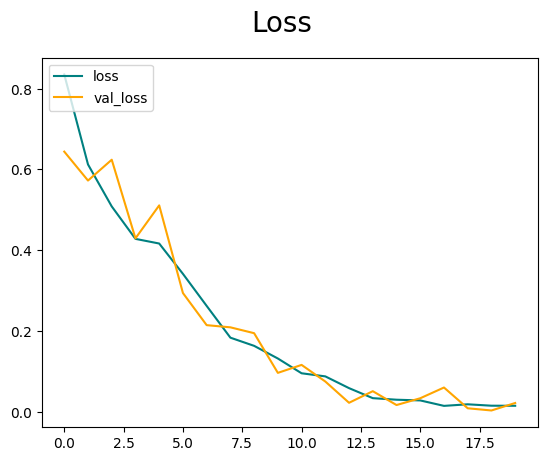

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

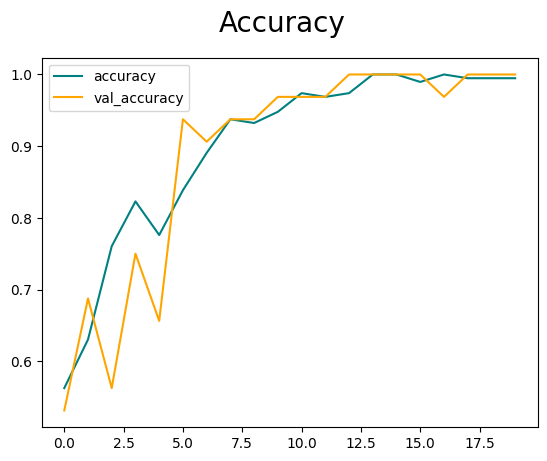

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [54]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [55]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [56]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [57]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [58]:
import cv2

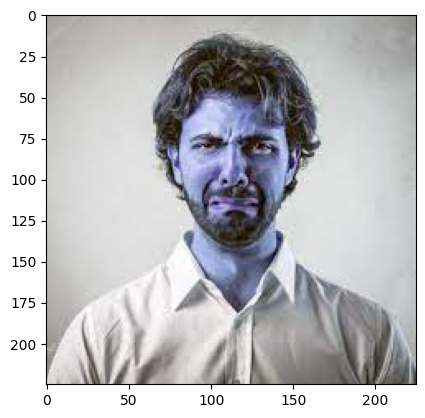

In [59]:
img = cv2.imread('ok.jpeg')
plt.imshow(img)
plt.show()

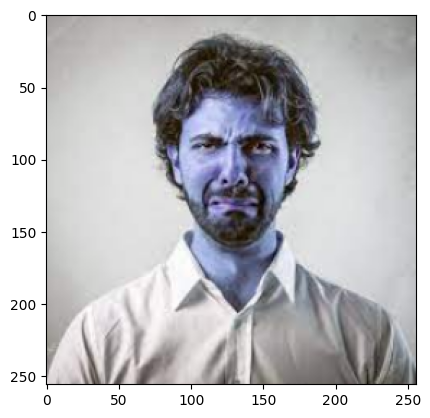

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 147ms/step


In [62]:
yhat

array([[0.9933464]], dtype=float32)

In [63]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [65]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model('imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

OSError: ignored